In [15]:
from GameEnvironment import ModelGameEnvironment
import torch
from ActorCritic import ActorCritic, Actor, Critic
import pandas as pd

In [16]:
game = ModelGameEnvironment(.5, 2, .99, 10)

In [17]:
game.reset()


(tensor([50., 50.]), None, False)

In [18]:
print(game.step(torch.Tensor([10,10]) ))
print(f"quantity history {game.demand}")
print(f"profit history {game.profit}")

(tensor([10., 10.]), tensor([950., 950.]), False)
quantity history 100
profit history tensor([[950.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [950.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])


In [19]:
##################################
# Independent Learning Algorithm #
##################################

env = ModelGameEnvironment(.5, 2, .99, 10)

# Initialize actor and critic
input_dim = 2


# Initialize actor-critic algorithm
agent1 = ActorCritic(Actor(input_dim), 
                    Critic(input_dim), .95)


agent2 = ActorCritic(Actor(input_dim), 
                    Critic(input_dim), .95)

reward_memory = dict()

# Training loop
num_episodes = 100
for episode in range(num_episodes):
    total_reward_agent1 = 0
    total_reward_agent2 = 0
    state, _, done = env.reset()

    
    while not done:
        action_profile = torch.Tensor(2)
        log_probs = []


        
        action1, log_prob1 = agent1.sample_action(state)
        action_profile[0] = action1


        action2, log_prob2 = agent2.sample_action(state)
        action_profile[1] = action2
        log_probs.append([log_prob1,log_prob2])        
        
        # Compute reward based on the action profile
        next_state, reward_tensor, done = env.step(action_profile)
        #print(f"next state: {next_state}, reward_tensor: {reward_tensor}, done: {done}")
        reward = torch.sum(reward_tensor).item()

        #for i in range(2):
        agent1.update(state,  reward_tensor[0], log_probs[0][0], next_state)
        total_reward_agent1 += reward_tensor[0]
        agent2.update(state,  reward_tensor[1], log_probs[0][1], next_state)        
        total_reward_agent2 += reward_tensor[1]

    #if episode % 10 == 0:
        
    #print(f"Episode {episode} complete")
    #print(total_reward_agent1,total_reward_agent2)
    reward_memory[f"{episode}"] = {"agent 1": total_reward_agent1.item(), "agent 2": total_reward_agent2.item()}

pd.DataFrame(reward_memory).T

/Users/pacoaristi/Desktop/Github ferdos/EquiLearn_Sberg/classes/ActorCritic.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reward = torch.tensor(reward, dtype=torch.float32, device=self.device)


,agent 1,agent 2
0,-31252.806641,4656.839844
1,-12205.019531,-11404.078125
2,-38918.156250,-11619.839844
3,-46529.203125,-9157.976562
4,-48688.449219,-3263.164551
...,...,...
95,-43115.828125,-2649.133545
96,-43094.761719,-2647.906250
97,-43055.078125,-2647.278320
98,-43048.210938,-2646.538330


<Axes: >

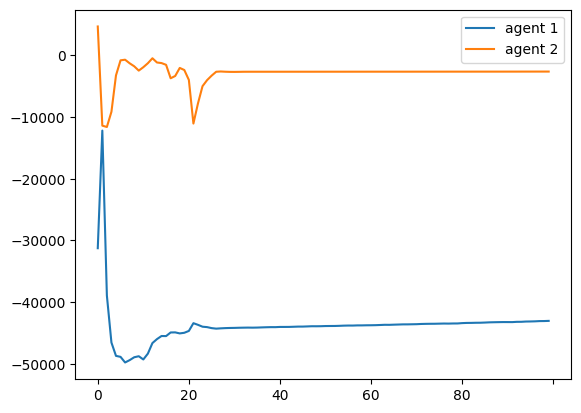

In [20]:
pd.DataFrame(reward_memory).T.plot()


In [21]:
env.price

tensor([[-32.8182, -32.7824, -32.7754, -32.7668, -32.7361, -32.7939, -32.7752,
         -32.7854, -32.7725, -32.7700],
        [ -3.0545,  -3.0530,  -3.0525,  -3.0537,  -3.0537,  -3.0521,  -3.0527,
          -3.0535,  -3.0527,  -3.0525]])